In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

In [4]:
etc = pd.read_csv('insta_hiphop1.csv',encoding='utf-8')

In [5]:
len(etc)

1382

In [6]:
etc.head(3)

,Unnamed: 0,날짜,월,일,계정,좋아요,해시태그,링크
0,0,2020.10.03 13:39,10,3,lookatsoo.kr,81,"['디지털아트', '앨범아트', 'graphicdesign', 'hiphop', '...",https://www.instagram.com/p/CF3kdtvHF0g/
1,1,2020.09.09 15:09,9,9,lookatsoo.kr,76,"['artwork', '포스터', '사운드클라우드', '앨범자켓', '아트워크', ...",https://www.instagram.com/p/CE57wjrHDA1/
2,2,2020.08.28 13:51,8,28,lookatsoo.kr,114,"['앨범자켓', '힙합', '디지털아트', '포스터디자인', 'hiphop', '사...",https://www.instagram.com/p/CEa5MbwH9BQ/


In [7]:
etc2=list(etc.해시태그)
etc2[0:2]

["['디지털아트', '앨범아트', 'graphicdesign', 'hiphop', '사운드클라우드', 'photoshop', '포스터', 'soundcloud', 'artwork', '포스터디자인', '앨범커버', '일러스트', '포토샵', '힙합', '아트워크', 'albumcover', '사진', '앨범자켓', 'photo', 'illustration', '그래픽']",
 "['artwork', '포스터', '사운드클라우드', '앨범자켓', '아트워크', '포스터디자인', 'photo', '그래픽', 'soundcloud', '포토샵', 'hiphop', '사진', '앨범커버', '힙합', 'albumcover', '일러스트', 'graphicdesign', '앨범아트', '디지털아트', 'illustration', 'photoshop']"]

In [9]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['디지털아트 앨범아트 graphicdesign hiphop 사운드클라우드 photoshop 포스터 soundcloud artwork 포스터디자인 앨범커버 일러스트 포토샵 힙합 아트워크 albumcover 사진 앨범자켓 photo illustration 그래픽']

In [11]:
from konlpy.tag import Kkma
kkma = Kkma()

In [12]:
import time
import datetime
start = time.time()

In [14]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))
    
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

0:06:52


In [15]:
from gensim import corpora, models 
import gensim

In [17]:
high_score_reviews = dataset

In [19]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [24]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


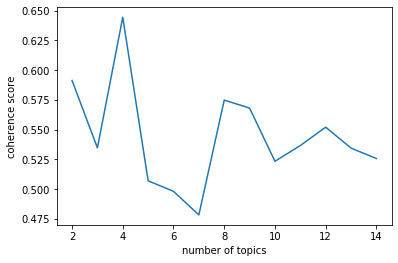

In [25]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [30]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

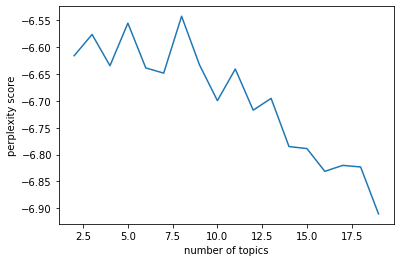

In [31]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [59]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.1,id2word = dictionary)

In [60]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.043*"힙합" + 0.042*"음악" + 0.040*"힙합음악" + 0.012*"래퍼" + 0.012*"그램" + 0.011*"한국" + 0.010*"노래" + 0.008*"한국힙합" + 0.008*"스타" + 0.007*"추천" + 0.007*"뮤직" + 0.006*"앨범" + 0.005*"티스트" + 0.005*"비트" + 0.005*"스트" + 0.005*"뮤지션" + 0.004*"공연" + 0.004*"데일리" + 0.004*"와이" + 0.004*"커버"'),
 (1,
  '0.042*"힙합" + 0.037*"음악" + 0.035*"힙합음악" + 0.020*"그램" + 0.015*"스타" + 0.013*"한국" + 0.012*"추천" + 0.011*"한국힙합" + 0.010*"뮤직" + 0.007*"플레이" + 0.007*"데일리" + 0.007*"공연" + 0.006*"래퍼" + 0.006*"힙합뮤직" + 0.006*"힙합공연" + 0.006*"음악추천" + 0.006*"국힙" + 0.006*"힙합스타그램" + 0.006*"힙합콘서트" + 0.006*"와이"'),
 (2,
  '0.046*"힙합" + 0.045*"음악" + 0.042*"힙합음악" + 0.035*"그램" + 0.024*"스타" + 0.021*"추천" + 0.020*"노래" + 0.016*"국힙" + 0.015*"음악스타그램" + 0.015*"노래추천" + 0.015*"플레이" + 0.015*"외힙" + 0.014*"리스트" + 0.014*"플레이리스트" + 0.014*"힙합음악추천" + 0.014*"기록" + 0.014*"외국" + 0.014*"외국힙합" + 0.014*"노래스타그램" + 0.014*"음악기록"'),
 (3,
  '0.029*"힙합" + 0.020*"그램" + 0.018*"음악" + 0.018*"스타" + 0.017*"힙합음악" + 0.013*"뮤직" + 0.013*"데일리" + 0.008*"패션" + 0.007*"스트릿" + 0.007*"유니" +

In [61]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.111188 -0.072471       1        1  32.649189
1     -0.005255  0.035901       2        1  26.713314
3     -0.138006 -0.041591       3        1  20.432205
0      0.032073  0.078160       4        1  20.205290, topic_info=      Term       Freq      Total Category  logprob  loglift
1119    기록  55.000000  55.000000  Default  30.0000  30.0000
720     외힙  59.000000  59.000000  Default  29.0000  29.0000
1416    외국  54.000000  54.000000  Default  28.0000  28.0000
1417  외국힙합  54.000000  54.000000  Default  27.0000  27.0000
1418  음악기록  54.000000  54.000000  Default  26.0000  26.0000
...    ...        ...        ...      ...      ...      ...
288   노래추천   9.369967  77.954666   Topic4  -5.5739  -0.5194
18    클라우드   8.355199  35.367836   Topic4  -5.6886   0.1563
5      사운드   8.221413  30.704395   Topic4  -5.7047   0.2816
114   힙합추천   8.500297  63.579132   Topic4  -5.6713  -0.4130
662     국힙   8.439049  94.690880   Topic4  -5.6786  -0.8185

[303 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
350       1  0.092816      가을
350       3  0.835343      가을
350       4  0.092816      가을
316       4  0.819732      강변
2397      3  0.799328      강원
...     ...       ...     ...
134       4  0.605964  힙합프로듀싱
117       1  0.141715   힙합플레이
117       2  0.283431   힙합플레이
117       3  0.519623   힙합플레이
117       4  0.047238   힙합플레이

[496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [62]:
kk = ldamodel.show_topic(3,topn=80000)
type(ldamodel.show_topic)
kk2=pd.DataFrame(kk)
kk2

,0,1
0,힙합,0.029135
1,그램,0.019682
2,음악,0.017893
3,스타,0.017560
4,힙합음악,0.016594
...,...,...
2471,에이체스,0.000084
2472,천안역,0.000084
2473,아이돌지망생,0.000084
2474,순두부치즈,0.000084
